(array([], dtype=int64), array([], dtype=int64))
0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


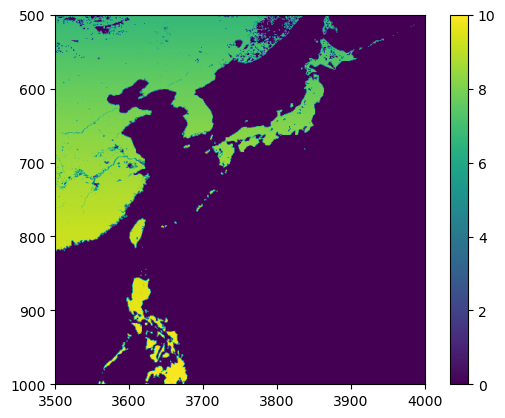

In [6]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict


area_data = np.load('/work/a06/tsuda/m1//12grid_area_result.npy')

#陸地面積による重みづけを導入したい。人口/人口密度で陸地面積を計算
land_area = np.zeros((2160, 4320))
#陸地ではないところにはnanを入れる
import numpy as np

land_area[(pop_density_data > 0) & (pop_count_data > 0)] = pop_count_data[(pop_density_data > 0) & (pop_count_data > 0)] / pop_density_data[(pop_density_data > 0) & (pop_count_data > 0)]
land_area[(pop_density_data <= 0) | (pop_count_data <= 0)] = np.nan
#nunを除いて、対象陸地面積が一番小さなグリッド面積の何倍かを計算
area_ratio = land_area / area_data.max() * 10
area_ratio[(pop_density_data <= 0) | (pop_count_data <= 0)]=np.nan

# NaNを0に置き換える
area_ratio = np.nan_to_num(area_ratio, nan=0.0)

# 四捨五入して整数型に変換
grid_counts = np.round(area_ratio).astype(int)

# grid_countsが負になっているものがあるかをチェック、そのグリッドのland_areaとarea_dataを表示
negative_indices = np.where(grid_counts < 0)
print(negative_indices)
print(np.min(grid_counts))

print(area_ratio)

#area_ratioを描画
plt.imshow(area_ratio)
plt.xlim()
plt.colorbar()
plt.xlim(3500,4000)
plt.ylim(1000,500)
plt.show()



In [11]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

# area_data = np.load('/work/a06/tsuda/m1//12grid_area_result.npy')
years = [900, 1400, 1700, 1850, 1950, 2000]
class_labels = {}  # 辞書型で初期化
repeated_data = {}

for year in years:
    pop_count_data = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')
    pop_density_data = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')
    total_population_per_class = np.sum(pop_count_data[pop_count_data >= 0])

    # 人口密度が百以上のグリッドのみ抽出
    indices = np.where(pop_density_data >= 100)
    print(len(indices[0]))

    # Climate colors and order
    climate_colors = OrderedDict({
        'Af': (255/255, 0/255, 0/255),
        'Am': (255/255, 165/255, 0/255),
        'Aw': (255/255, 255/255, 0/255),
        'BW': (214/255, 164/255, 96/255),
        'BSh': (218/255, 165/255, 32/255),
        'BSk': (184/255, 134/255, 11/255),
        'Cs': (143/255, 188/255, 143/255),
        'Cw': (102/255, 205/255, 170/255),
        'Cfa': (154/255, 205/255, 50/255),
        'Cfb': (0/255, 100/255, 0/255),
        'Cfc': (0/255, 128/255, 0/255),
        'Ds': (220/255, 220/255, 220/255),
        'Dw': (211/255, 211/255, 211/255),
        'Dfa': (192/255, 192/255, 192/255),
        'Dfb': (169/255, 169/255, 169/255),
        'Dfc': (128/255, 128/255, 128/255),
        'Dfd': (169/255, 169/255, 169/255),
        'ET': (112/255, 128/255, 144/255),
        'EF': (0/255, 0/255, 0/255)
    })

    # Climate class order
    climate_class_order = list(climate_colors.keys())
    # print(list(climate_colors.keys()))

    np.save(f'grid_number_100_{year}', len(indices[0]))
    # print(np.sum(pop_count_data[indices])/np.sum(pop_count_data[pop_count_data >= 0]))
    new_climate_data_str = np.load(f'climate_class_{year}_12grid.npy')
    filtered_values = new_climate_data_str[indices]
    # class_data2[i] = filtered_values
    repeated_values = np.repeat(filtered_values, grid_counts[indices])
    # repeated_dataに追加
    repeated_data[year] = repeated_values
    # 保存
    np.save(f'repeated_values100_{year}', repeated_values)

print(repeated_data[900])

3276
4774
11337
45221
81827
149169
['Dfb' 'Dfb' 'Dfb' ... 'BSk' 'BSk' 'BSk']


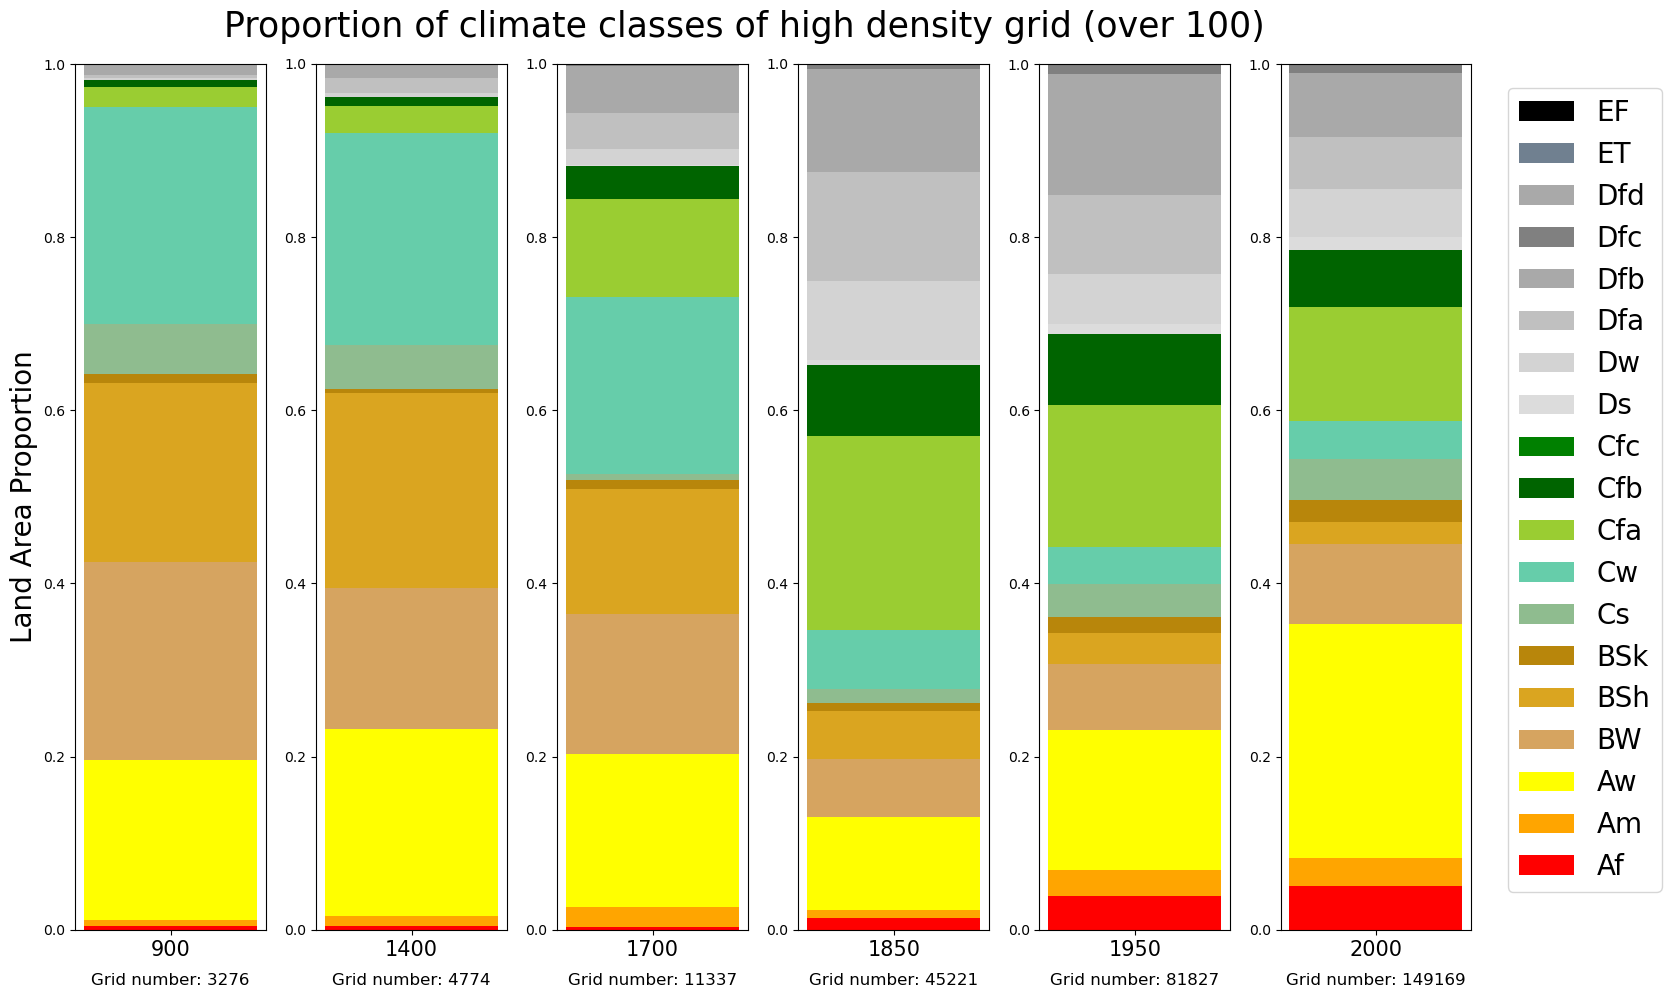

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

# 気候クラスとその色の定義
climate_colors = OrderedDict({
    'Af': (255/255, 0/255, 0/255),
    'Am': (255/255, 165/255, 0/255),
    'Aw': (255/255, 255/255, 0/255),
    'BW': (214/255, 164/255, 96/255),
    'BSh': (218/255, 165/255, 32/255),
    'BSk': (184/255, 134/255, 11/255),
    'Cs': (143/255, 188/255, 143/255),
    'Cw': (102/255, 205/255, 170/255),
    'Cfa': (154/255, 205/255, 50/255),
    'Cfb': (0/255, 100/255, 0/255),
    'Cfc': (0/255, 128/255, 0/255),
    'Ds': (220/255, 220/255, 220/255),
    'Dw': (211/255, 211/255, 211/255),
    'Dfa': (192/255, 192/255, 192/255),
    'Dfb': (169/255, 169/255, 169/255),
    'Dfc': (128/255, 128/255, 128/255),
    'Dfd': (169/255, 169/255, 169/255),
    'ET': (112/255, 128/255, 144/255),
    'EF': (0/255, 0/255, 0/255)
})

# 年代のリストを定義
years = [900, 1400, 1700, 1850, 1950, 2000]  

# 各年代のデータを格納するリスト
all_normalized_class_counts = []
grid_number = {}

for year in years:
    repeated_data = np.load(f'repeated_values100_{year}.npy', allow_pickle=True)

    # 各年代のデータをカウント
    yearly_counts = Counter(repeated_data)

    # 各年代の総数を取得
    total_counts = sum(yearly_counts.values())

    # 各年代のデータを正規化
    normalized_class_counts = [yearly_counts[cl] / total_counts for cl in climate_colors.keys()]
    all_normalized_class_counts.append(normalized_class_counts)
    grid_number[year] = np.load(f'grid_number_100_{year}.npy')

# 各年のall_normalized_class_countsを積み上げ棒グラフで描画
fig = plt.figure(figsize=(15, 10))
aspect_ratio = 4  # アスペクト比（高さ/幅）

for idx, year in enumerate(years):
    ax = fig.add_subplot(1, len(years), idx + 1, aspect=aspect_ratio)
    bottom = 0
    for i, cl in enumerate(climate_colors.keys()):
        class_value = all_normalized_class_counts[idx][i]
        ax.bar(year, class_value, bottom=bottom, label=cl, color=climate_colors[cl])
        bottom += class_value
    ax.set_xticks([year])
    ax.set_xticklabels([str(year)], fontsize=15)
    ax.text(year, -0.05, f'Grid number: {grid_number[year]}', ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=12)
    #ax.yaxis.set_ticks([])  # 目盛を削除

# グラフの装飾
axes = fig.get_axes()
axes[0].set_ylabel('Land Area Proportion', fontsize=20)
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 0.5), loc='center left', prop={'size': 20})
plt.suptitle('Proportion of climate classes of high density grid (over 100)', fontsize=25)

plt.tight_layout(rect=[0, 0, 1, 0.99])

# ここで保存
plt.savefig('final_result_over100.png', dpi=300)

# 表示
plt.show()


In [2]:
import numpy as np
from collections import Counter, OrderedDict

repeated_data = {}
years = [900, 1400, 1700, 1850, 1950, 2000]
A = {}

for year in years:
    pop_count_data = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')
    pop_density_data = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')
    new_climate_data_str = np.load(f'climate_class_{year}_12grid.npy')
    # Climate colors and order
    climate_colors = OrderedDict({
        'Af': (255/255, 0/255, 0/255),
        'Am': (255/255, 165/255, 0/255),
        'Aw': (255/255, 255/255, 0/255),
        'BW': (214/255, 164/255, 96/255),
        'BSh': (218/255, 165/255, 32/255),
        'BSk': (184/255, 134/255, 11/255),
        'Cs': (143/255, 188/255, 143/255),
        'Cw': (102/255, 205/255, 170/255),
        'Cfa': (154/255, 205/255, 50/255),
        'Cfb': (0/255, 100/255, 0/255),
        'Cfc': (0/255, 128/255, 0/255),
        'Ds': (220/255, 220/255, 220/255),
        'Dw': (211/255, 211/255, 211/255),
        'Dfa': (192/255, 192/255, 192/255),
        'Dfb': (169/255, 169/255, 169/255),
        'Dfc': (128/255, 128/255, 128/255),
        'Dfd': (169/255, 169/255, 169/255),
        'ET': (112/255, 128/255, 144/255),
        'EF': (0/255, 0/255, 0/255)
    })

    # Climate class order
    climate_class_order = list(climate_colors.keys())
    
    
    indices = np.where(pop_density_data >= 100)
    np.save(f'grid_number_{year}', (len(indices[0])))
    print(np.min(pop_count_data[indices]))
    pop_count = (pop_count_data / np.min(pop_count_data[indices]))*10
    pop_repeat = np.round(pop_count).astype(int)
    A[year] = np.round(np.sum(pop_count_data[indices])).astype(int)  # 修正箇所
    filtered_values = new_climate_data_str[indices]
    repeated_values = np.repeat(filtered_values, pop_repeat[indices])  # 修正箇所
    repeated_data[year] = repeated_values
    np.save(f'repeated_values_popcount100_{year}', repeated_values)

print(repeated_data[900])

206.350671229
112.31533122
129.61068351
106.286623353
120.191357553
106.413212015
['Dfb' 'Dfb' 'Dfb' ... 'BSk' 'BSk' 'BSk']


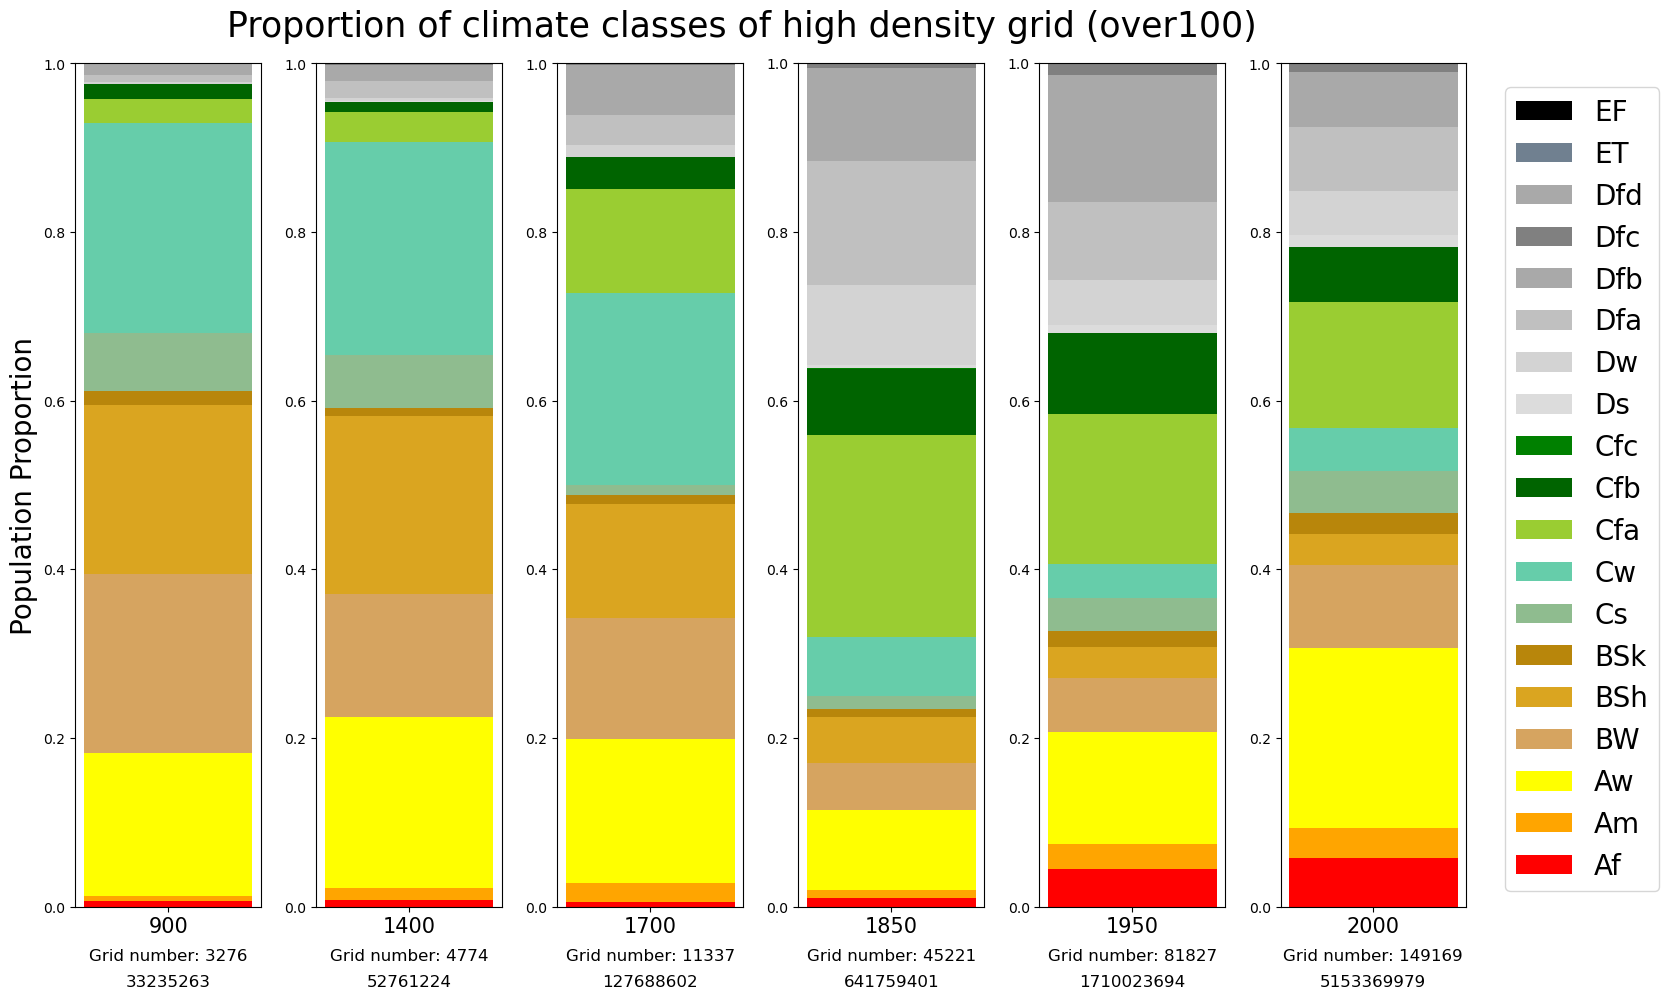

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

# 気候クラスとその色の定義
climate_colors = OrderedDict({
    'Af': (255/255, 0/255, 0/255),
    'Am': (255/255, 165/255, 0/255),
    'Aw': (255/255, 255/255, 0/255),
    'BW': (214/255, 164/255, 96/255),
    'BSh': (218/255, 165/255, 32/255),
    'BSk': (184/255, 134/255, 11/255),
    'Cs': (143/255, 188/255, 143/255),
    'Cw': (102/255, 205/255, 170/255),
    'Cfa': (154/255, 205/255, 50/255),
    'Cfb': (0/255, 100/255, 0/255),
    'Cfc': (0/255, 128/255, 0/255),
    'Ds': (220/255, 220/255, 220/255),
    'Dw': (211/255, 211/255, 211/255),
    'Dfa': (192/255, 192/255, 192/255),
    'Dfb': (169/255, 169/255, 169/255),
    'Dfc': (128/255, 128/255, 128/255),
    'Dfd': (169/255, 169/255, 169/255),
    'ET': (112/255, 128/255, 144/255),
    'EF': (0/255, 0/255, 0/255)
})

# 年代のリストを定義
years = [900, 1400, 1700, 1850, 1950, 2000]  

# 各年代のデータを格納するリスト
all_normalized_class_counts = []
grid_number = {}
pop_count_data = {}

for year in years:
    repeated_data = np.load(f'repeated_values_popcount100_{year}.npy', allow_pickle=True)
    pop_count_data[year] = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')  # 修正箇所
    # 各年代のデータをカウント
    yearly_counts = Counter(repeated_data)

    # 各年代の総数を取得
    total_counts = sum(yearly_counts.values())

    # 各年代のデータを正規化
    normalized_class_counts = [yearly_counts[cl] / total_counts for cl in climate_colors.keys()]
    all_normalized_class_counts.append(normalized_class_counts)
    grid_number[year] = np.load(f'grid_number_{year}.npy')
    
# 各年のall_normalized_class_countsを積み上げ棒グラフで描画
fig = plt.figure(figsize=(15, 10))
aspect_ratio = 4  # アスペクト比（高さ/幅）

for idx, year in enumerate(years):
    ax = fig.add_subplot(1, len(years), idx + 1, aspect=aspect_ratio)
    bottom = 0
    for i, cl in enumerate(climate_colors.keys()):
        class_value = all_normalized_class_counts[idx][i]
        ax.bar(year, class_value, bottom=bottom, label=cl, color=climate_colors[cl])
        bottom += class_value
    ax.set_xticks([year])
    ax.set_xticklabels([str(year)], fontsize=15)
    ax.text(year, -0.05, f'Grid number: {grid_number[year]}', ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=12)
    #各年のnp.sum(pop_count_data[indices])を表示
    ax.text(year, -0.08,A[year], ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=12)  # 修正箇所
# グラフの装飾
axes = fig.get_axes()
axes[0].set_ylabel('Population Proportion', fontsize=20)
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 0.5), loc='center left', prop={'size': 20})
plt.suptitle('Proportion of climate classes of high density grid (over100)', fontsize=25)

plt.tight_layout(rect=[0, 0, 1, 0.99])

# ここで保存
plt.savefig('final_result__pop_count_over100.png', dpi=300)

# 表示
plt.show()